In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/body-performance-data/bodyPerformance.csv


# DATA READING

In [2]:
df_perform = pd.read_csv('/kaggle/input/body-performance-data/bodyPerformance.csv',
                         sep = "," , encoding="utf-8")
df_perform.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [3]:
df_perform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [4]:
df_perform.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [5]:
df_perform.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [6]:
df_perform.nunique()

age                          44
gender                        2
height_cm                   467
weight_kg                  1398
body fat_%                  527
diastolic                    89
systolic                    102
gripForce                   550
sit and bend forward_cm     528
sit-ups counts               81
broad jump_cm               245
class                         4
dtype: int64

In [7]:
#changing all datatypes to int
df_perform['age'] = df_perform.age.astype(int)
df_perform['height_cm'] = df_perform.height_cm.astype(int)
df_perform['weight_kg'] = df_perform.weight_kg.astype(int)
df_perform['body fat%_'] = df_perform['body fat_%'].astype(int)
df_perform['diastolic']=df_perform.diastolic.astype(int)
df_perform['systolic']=df_perform.systolic.astype(int)
df_perform['gripForce']=df_perform.gripForce.astype(int)

**EXPLORATORY ANALYSIS**

In [8]:
#highest height
max_height = df_perform['height_cm'].max()
max_height

193

In [9]:
#age with highest height
age = df_perform[df_perform['height_cm'] == max_height]['age']
print(age)

5386    30
Name: age, dtype: int64


In [10]:
#minimum weight
mini = df_perform['weight_kg'].min()
mini

26

In [11]:
#age with minimum weight
min_age = df_perform[df_perform['weight_kg']==mini]['age']
print(min_age)

4370    63
Name: age, dtype: int64


In [12]:
#minimum and maximum weight of female and male
gen = df_perform.groupby('gender').agg({'weight_kg':['min','max']})
gen

weight_kg     
             min  max
gender               
F             26  113
M             36  138

In [13]:
#class with max and min situp counts
classe = df_perform.groupby('class').agg({'sit-ups counts':['min','max']})
classe

sit-ups counts      
                 min   max
class                     
A               17.0  80.0
B               12.0  78.0
C                7.0  71.0
D                0.0  78.0

In [14]:
#gripforce greater than 50 and height less than 170 and weight greater than 70
grp = df_perform[(df_perform['gripForce']>50) & (df_perform['height_cm']<170)
                & (df_perform['weight_kg']>70)]
grp.head(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,body fat%_
50,48,M,169,75,14.7,94,149,51,24.7,55.0,246.0,A,14
243,40,M,169,84,25.0,93,132,57,19.8,40.0,220.0,B,25
663,36,M,168,83,22.9,87,139,55,13.0,61.0,222.0,B,22
798,34,M,169,77,22.8,90,150,51,25.9,47.0,217.0,B,22
879,63,M,167,73,24.4,83,157,53,24.6,31.0,189.0,A,24


In [15]:
#finding out highest top 5 diastolic
diastolic = df_perform['diastolic'].sort_values(ascending=False)
diastolic.head(5)

7495     156
8532     126
12693    121
685      120
10813    118
Name: diastolic, dtype: int64

**Highest diastolic at the range of 120 - 139mm hg could cause prehypertension**

**At the range of 140mm hg could cause high blood pressure**

# VISUALIZATION

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

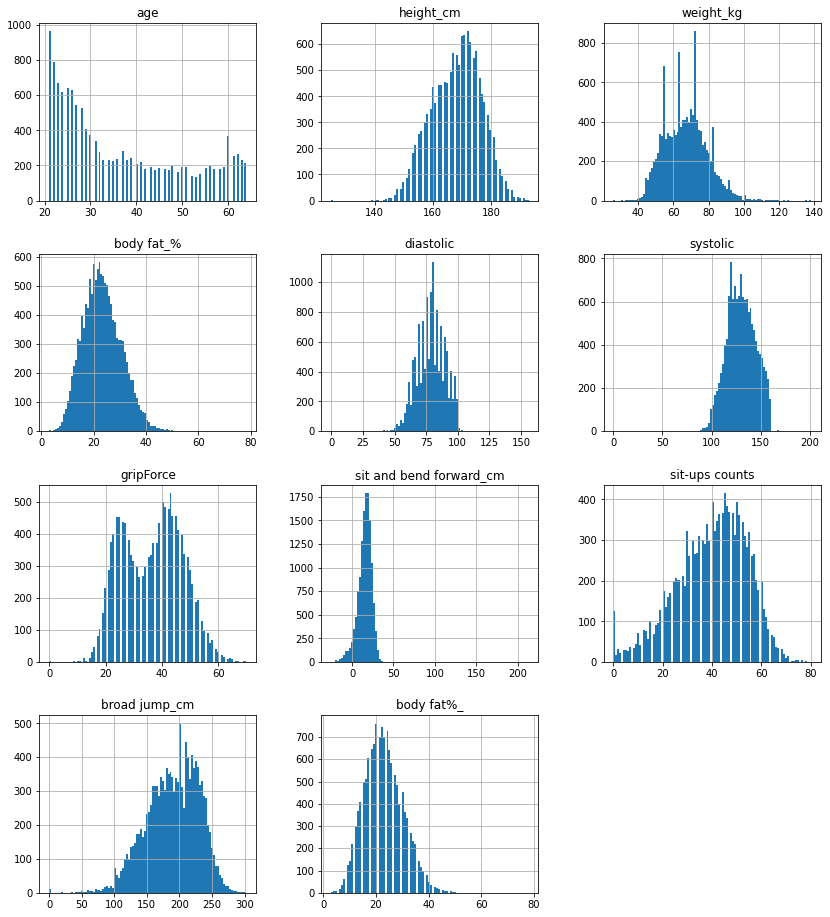

In [17]:
#Histogram of all data's feature Distribution
df_perform.hist(bins=100 , figsize=(14,16))
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

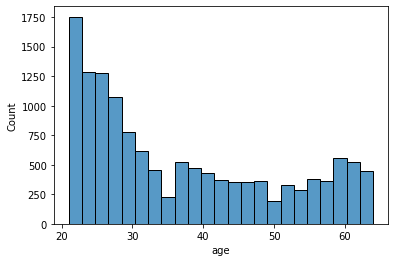

In [18]:
#Age Distribution
sns.histplot(data = df_perform,x = 'age')

In [19]:
px.histogram(df_perform,x='weight_kg',color='gender',
            title = 'female vs male in weight_kg',
            color_discrete_sequence = px.colors.sequential.Sunsetdark)

Mostly there are more females who are weighing around 70 to 80kg

In [20]:
px.histogram(df_perform,x='diastolic',color = 'gender',
            title = 'female vs male in diastolic',nbins = 20,
            color_discrete_sequence = px.colors.sequential.Sunsetdark)

Comparing the male and female in diastolic we can find out that most females are in the range of 70 to 79 mm hg which is a normal diastolic range

In [21]:
px.histogram(df_perform,x='broad jump_cm',color = 'class',
            title = 'class distribution in broad jump',nbins = 20,
            color_discrete_sequence = px.colors.sequential.Sunsetdark)

Class D has the highest broad jump

In [22]:
px.histogram(df_perform,x='gripForce',color = 'gender',
            title = 'gripforce in male vs female',nbins = 20,
            color_discrete_sequence = px.colors.sequential.Sunsetdark)

More number of males has the highest grip force compared to males

<AxesSubplot:xlabel='gender', ylabel='count'>

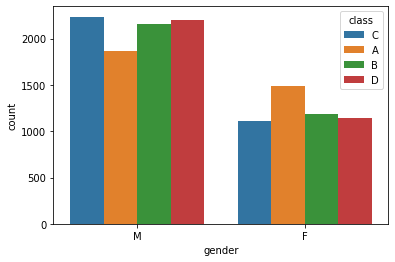

In [23]:
#data distribution with respect to class
sns.countplot(x = df_perform['gender'], data = df_perform, hue = df_perform['class'])

<AxesSubplot:ylabel='gender'>

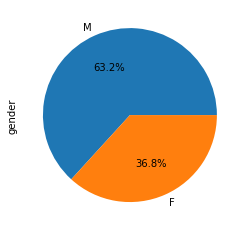

In [24]:
#Gender Distribution
round(df_perform['gender'].value_counts()/df_perform.shape[0]*100,2).plot.pie(autopct = '%1.1f%%')

<AxesSubplot:ylabel='class'>

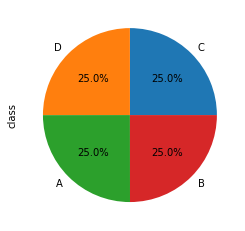

In [25]:
#class distribution
round(df_perform['class'].value_counts()/df_perform.shape[0]*100,2).plot.pie(autopct = '%1.1f%%')